# ファイルの読み込み・変換

In [1]:
import os 
import struct 
import numpy as np 
import matplotlib.pyplot as plt 


def load_mnist(path, kind='train'):
    """MNISTデータをpathからロード"""
    # 引数に指定したパスを結合（ラベルや画像のパスを作成）
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)

    # ファイルを読み込む
    # 引数は、"ファイル""モード"を指定（rbは読み込みのバイナリモード）
    with open(labels_path, 'rb') as lbpath:
        # バイナリを文字列に変換：unpack関数の引数に、”フォーマット””8バイト分のバイナリデータ”を指定して、
        # マジックナンバー、アイテムの個数を読み込む
        magic, n = struct.unpack('>II', lbpath.read(8))
        # ファイルからラベルを読み込み、配列を構築（fromfile関数の引数に、”ファイル””配列のデータ形式”を指定）
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        # 画像ピクセル情報の配列のサイズを変更
        #（行列：ラベルのサイズ、列数：特徴量の個数）
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        # ピクセル値の正規化（-1～1）
        images = ((images / 255.) - .5) * 2
    return images, labels

# トレーニングデータ、テストデータの定義

In [2]:
X_train, y_train = load_mnist('', kind='train')
X_test, y_test = load_mnist('', kind='t10k') 

# サンプル数、ピクセルサイズの表示
print('train　Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))
print('test　Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

train　Rows: 60000, columns: 784
test　Rows: 10000, columns: 784


# トレーニングデータの画像を可視化

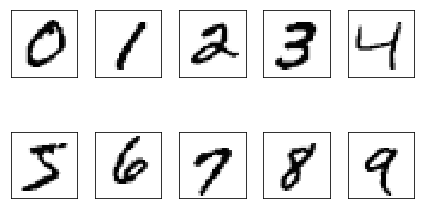

In [3]:
#subplotで描画を設定：引数で描画領域の行数 / 列数、x/y軸の統一を指定
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,) 
#配列を1次元に変形
ax = ax.flatten() 
for i in range(10):
    #配列を28×28に変形
    img = X_train[y_train == i][0].reshape(28, 28) 
    #色を指定
    ax[i].imshow(img, cmap='Greys') 


ax[0].set_xticks([]) 
ax[0].set_yticks([]) 
plt.tight_layout() 
# plt.savefig('images/12_5.png', dpi=300) 
plt.show() 

# ニューラルネットワーク

In [4]:
from sklearn.neural_network import MLPClassifier as MLP 

mlpclf = MLP(hidden_layer_sizes=(100), activation='relu', solver='adam', alpha=0.01,
             verbose=True, max_iter=60)

# トレーニング
history = mlpclf.fit(X_train, y_train) 

# テスト
y_pred = mlpclf.predict(X_test)

Iteration 1, loss = 0.43838943
Iteration 2, loss = 0.25045363
Iteration 3, loss = 0.19285269
Iteration 4, loss = 0.15985711
Iteration 5, loss = 0.13968093
Iteration 6, loss = 0.12434298
Iteration 7, loss = 0.10973135
Iteration 8, loss = 0.10146870
Iteration 9, loss = 0.09256403
Iteration 10, loss = 0.08870056
Iteration 11, loss = 0.08225716
Iteration 12, loss = 0.07718125
Iteration 13, loss = 0.07250223
Iteration 14, loss = 0.06813747
Iteration 15, loss = 0.06838014
Iteration 16, loss = 0.06326739
Iteration 17, loss = 0.05946856
Iteration 18, loss = 0.05816711
Iteration 19, loss = 0.05572547
Iteration 20, loss = 0.05125329
Iteration 21, loss = 0.05176899
Iteration 22, loss = 0.05037636
Iteration 23, loss = 0.04689405
Iteration 24, loss = 0.04760445
Iteration 25, loss = 0.04432006
Iteration 26, loss = 0.04395987
Iteration 27, loss = 0.04241197
Iteration 28, loss = 0.04309180
Iteration 29, loss = 0.04335389
Iteration 30, loss = 0.04076785
Iteration 31, loss = 0.03965270
Iteration 32, los

# 結果

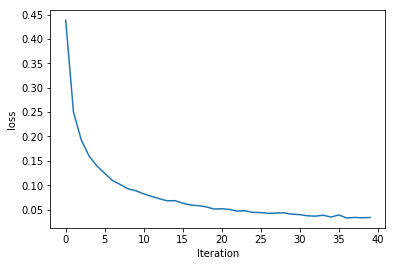

In [8]:
# グラフで表示
import matplotlib.pyplot as plt
plt.plot(history.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
mlpclf_score = accuracy_score(y_test, y_pred)

# 正解率の表示
print('Accuracy:', mlpclf_score)

Accuracy: 0.9751


# 混同行列

In [10]:
from sklearn.metrics import confusion_matrix as CM

# 縦軸が正解ラベル（0～9）、横軸が予測結果（0～9）で、混同行列を表示
print("{}".format(CM(y_test,y_pred)))

[[ 962    1    4    2    0    3    3    3    2    0]
 [   0 1125    6    0    0    0    2    0    2    0]
 [   4    0 1007    4    2    0    2    5    8    0]
 [   0    0    8  986    0    3    0    4    4    5]
 [   2    0    6    1  962    0    4    3    1    3]
 [   3    2    0   15    0  859    5    4    3    1]
 [   4    4    0    1    3    5  934    1    6    0]
 [   1    2    8    2    0    0    0 1012    2    1]
 [   3    0    4    5    2    3    2    3  948    4]
 [   2    3    3   10   14    7    1    7    6  956]]


In [11]:
from sklearn.metrics import classification_report as CR

# 縦軸がテストデータの正解ラベル（0～9）
# precission : 適合率（予測値ごとの正解率）
# recell：再現率（正解ラベルごとの正解率）
# f1-score：F値（適合率と再現率の調和平均）
# support：データ数

print("{}".format(CR(y_test, y_pred)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.96      0.98      0.97      1032
          3       0.96      0.98      0.97      1010
          4       0.98      0.98      0.98       982
          5       0.98      0.96      0.97       892
          6       0.98      0.97      0.98       958
          7       0.97      0.98      0.98      1028
          8       0.97      0.97      0.97       974
          9       0.99      0.95      0.97      1009

avg / total       0.98      0.98      0.98     10000



# 正しく分類されなかった画像を表示

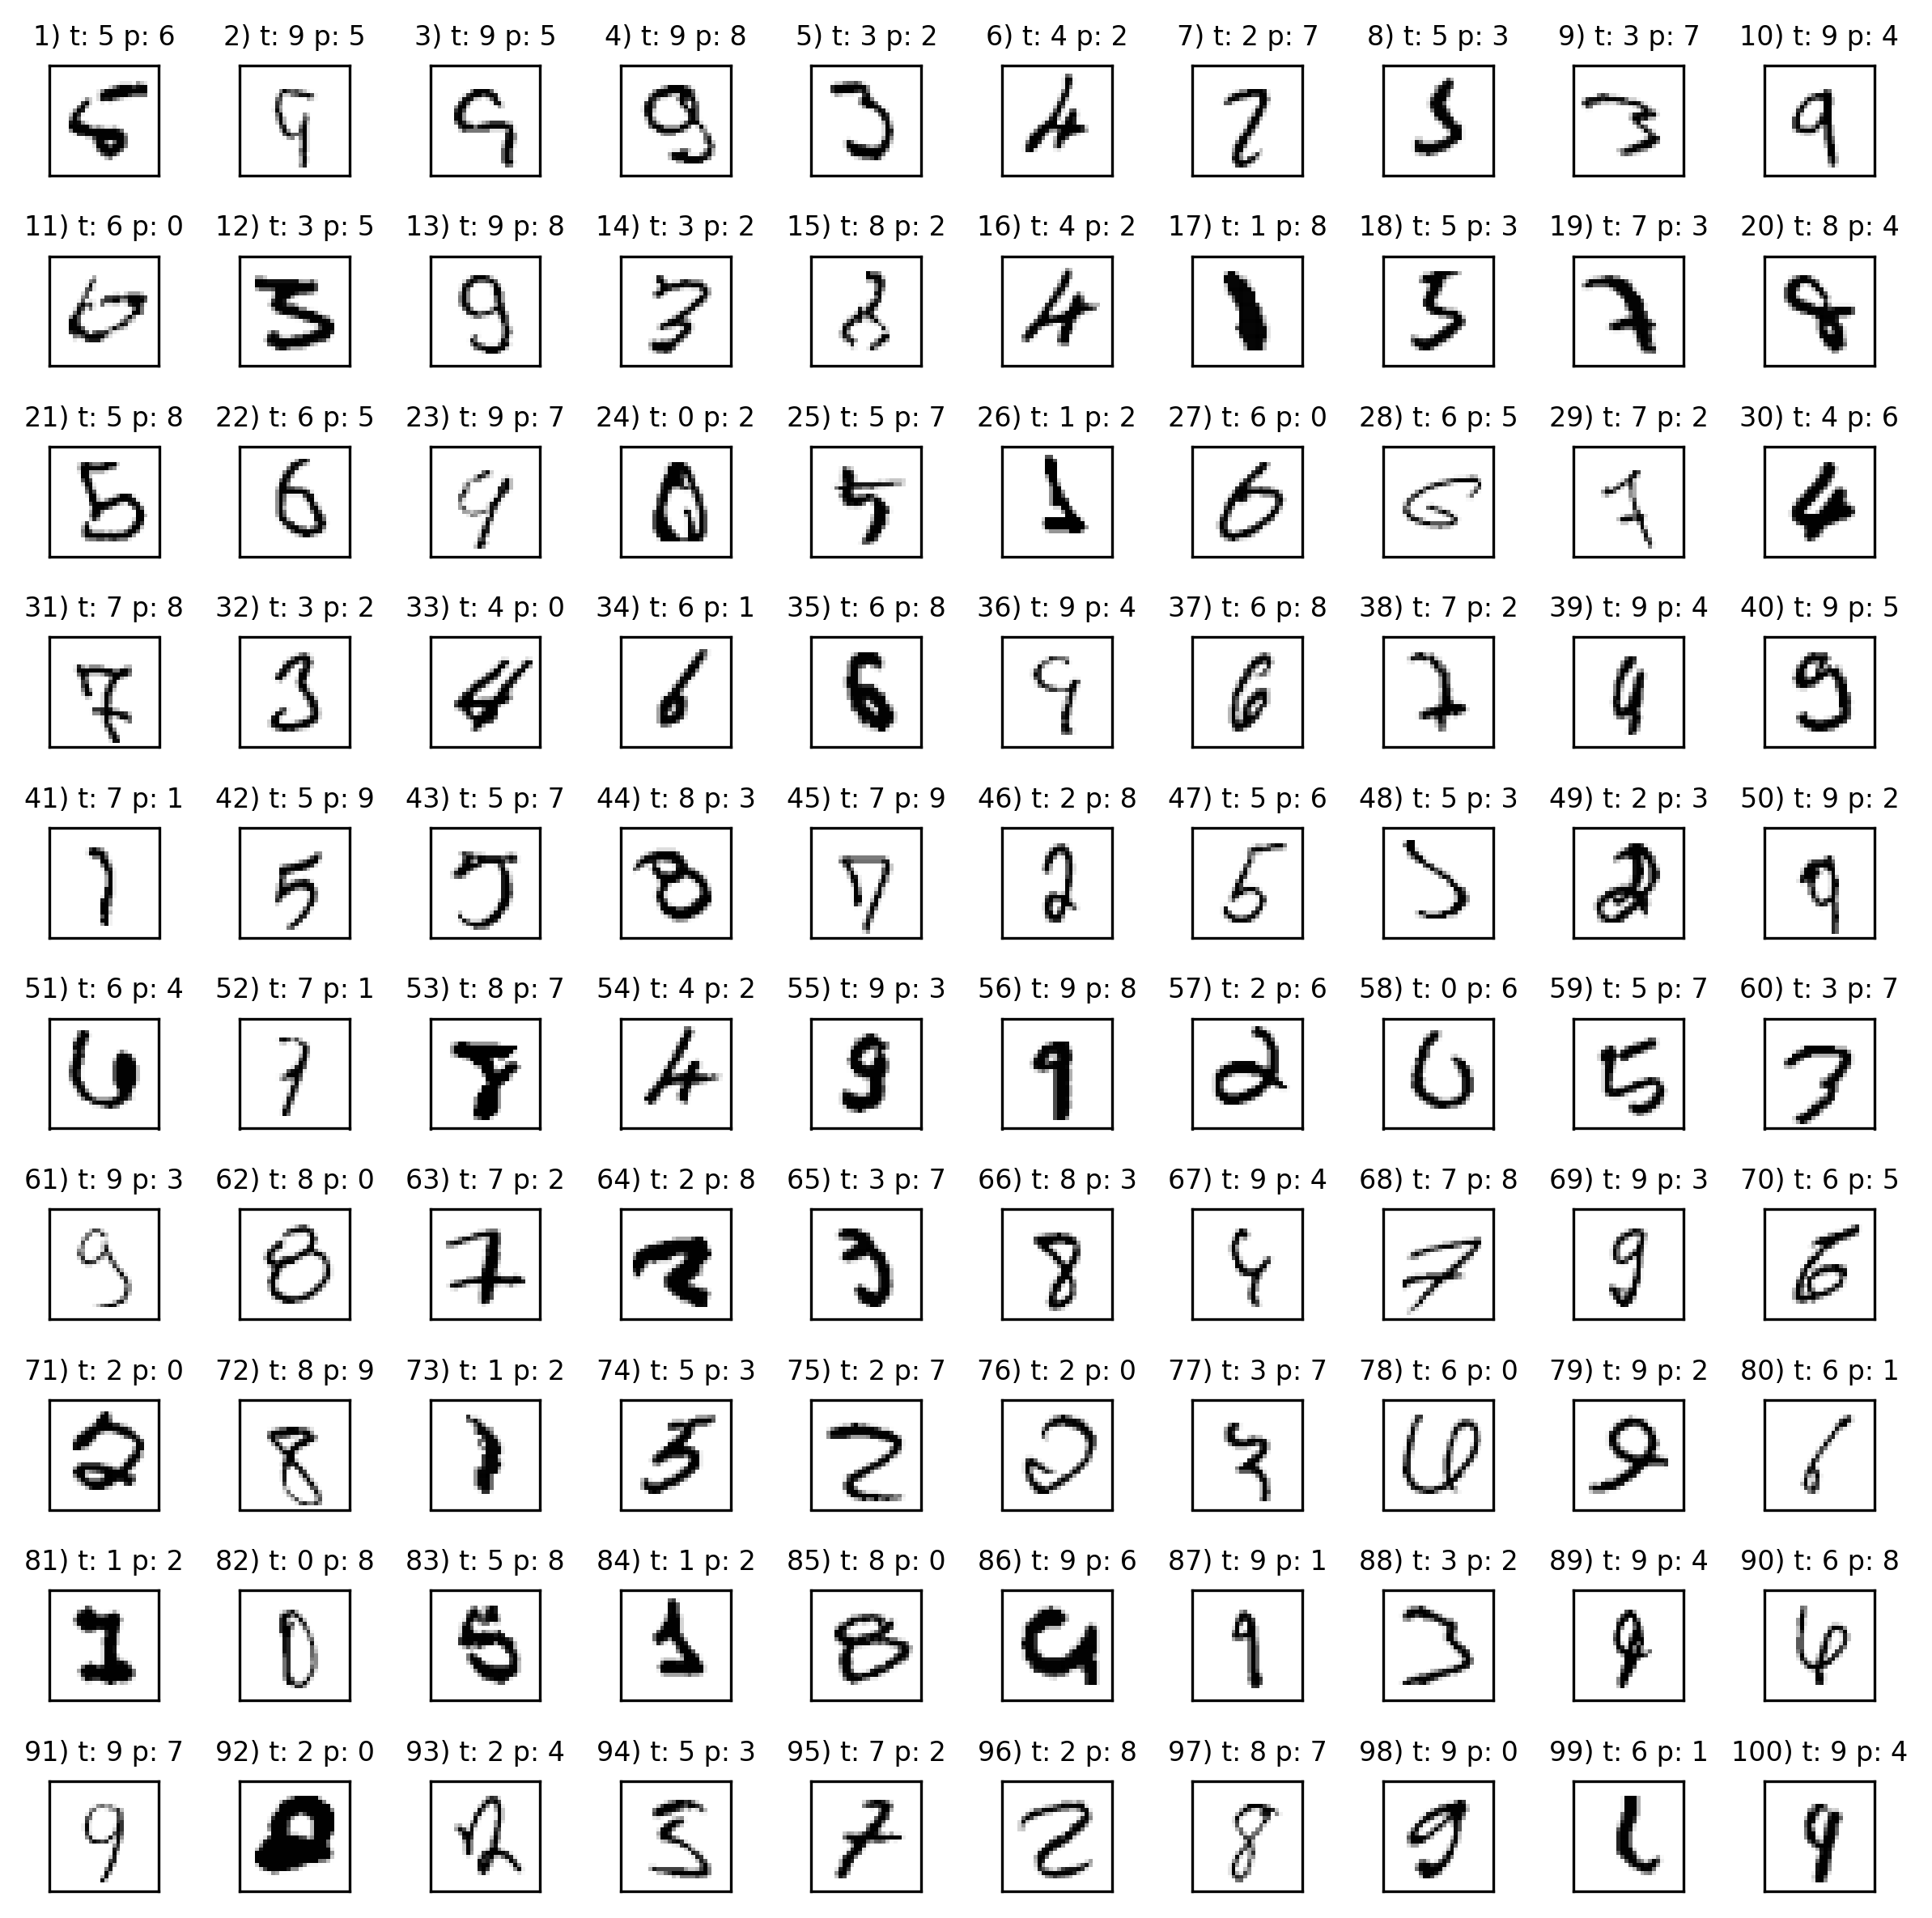

In [12]:
miscl_img = X_test[y_test != y_pred][:100] 
correct_lab = y_test[y_test != y_pred][:100] 
miscl_lab = y_pred[y_test != y_pred][:100] 

fig, ax = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True, figsize=(8, 8), dpi=300) 
ax = ax.flatten() 
for i in range(100): 
    img = miscl_img[i].reshape(28, 28) 
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]), fontsize=8) 

ax[0].set_xticks([]) 
ax[0].set_yticks([]) 
plt.tight_layout() 
plt.show()